# 05 - Taming Text

In this homework we will explore a relatively large corpus of emails released during the Hillary Clinton email controversy.

Importing useful librairies

In [10]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image
from IPython.core.display import HTML 
import matplotlib.pyplot as plt  
% matplotlib inline
import random
from datetime import datetime
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'
import nltk
from nltk import word_tokenize
from wordcloud import WordCloud
nltk.download()
from nltk.corpus import stopwords


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


Reading the csv containing the emails

In [21]:
emails = pd.read_csv("hillary-clinton-emails/Emails.csv",usecols=['ExtractedSubject','RawText', 'ExtractedBodyText', 'ExtractedFrom'])
emails.head()

,ExtractedSubject,ExtractedFrom,ExtractedBodyText,RawText
0,FW: Wow,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,NaN,NaN,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,Re: Chris Stevens,"Mills, Cheryl D <MillsCD@state.gov>",Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,FVV: Cairo Condemnation - Final,"Mills, Cheryl D <MillsCD@state.gov>",NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,NaN,NaN,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


Binding all the text from the emails

In [41]:
text_str=emails['ExtractedBodyText'].astype(str)
all_text = " ".join(str(x) for x in text_str)
all_text = all_text.replace("\n", " ")

Creating the World Cloud

In [42]:
wc = WordCloud(max_words=1000, mask=None, stopwords=None, margin=10,
               random_state=1).generate(all_text)

Displaying the World Cloud

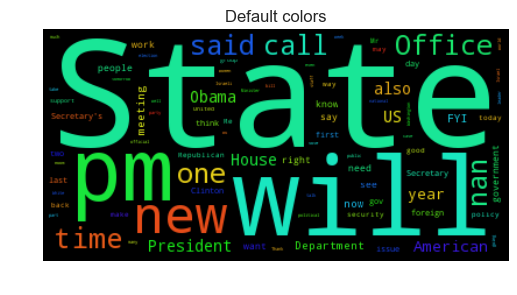

In [43]:
default_colors = wc.to_array()
plt.figure()
plt.title("Default colors")
plt.imshow(default_colors)
plt.axis("off")
plt.show()

### Data cleaning

We will first tokenize the text

In [15]:
tokens = nltk.word_tokenize(all_text)